# Feedforward neural networks (FNN) or Multi-layer Perceptron (MLP)

- see: https://www.deeplearningbook.org/contents/mlp.html
- see: https://scikit-learn.org/stable/modules/neural_networks_supervised.html
- see: https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/
- see: https://www.geeksforgeeks.org/multi-layer-perceptron-learning-in-tensorflow/  

## Types of Neural Networks

The DNN depicted on the right of the image is a simple neural network called `perceptron`. It consists of a single layer, which is the input layer, with multiple neurons with their own weights; there are no hidden layers. The perceptron algorithm learns the weights for the input signals in order to draw a linear decision boundary.

However, to solve more complicated, non-linear problems related to image processing, computer vision, and natural language processing tasks, we work with deep neural networks.

Check out Datacamp’s [**Introduction to Deep Neural Networks**](https://www.datacamp.com/tutorial/introduction-to-deep-neural-networks) tutorial to learn more about deep neural networks and how to construct one from scratch utilizing TensorFlow and Keras in Python. If you would prefer to use R language instead, Datacamp’s [**Building Neural Network (NN) Models in R**](https://www.datacamp.com/tutorial/neural-network-models-r) has you covered.

There are several types of ANN, each designed for specific tasks and architectural requirements. Let's briefly discuss some of the most common types before diving deeper into MLPs next.

### Feedforward Neural Networks (FNN)

These are the simplest form of ANNs (**Artificial Neural Network**), where information flows in one direction, from input to output. There are `no cycles or loops` in the network architecture. `Multi-layer perceptrons (MLP)` are a type of feedforward neural network.

### Recurrent Neural Networks (RNN)

In **RNNs**, connections between nodes form directed cycles, allowing information to persist over time. This makes them suitable for tasks involving sequential data, such as time series prediction, natural language processing, and speech recognition.

### Convolutional Neural Networks (CNN)

**CNNs** are designed to effectively process grid-like data, such as images. They consist of layers of convolutional filters that learn hierarchical representations of features within the input data. CNNs are widely used in tasks like image classification, object detection, and image segmentation.

### Long Short-Term Memory Networks (LSTM) and Gated Recurrent Units (GRU)

These are specialized types of recurrent neural networks designed to address the vanishing gradient problem in traditional RNN. **LSTMs and GRUs** incorporate gated mechanisms to better capture long-range dependencies in sequential data, making them particularly effective for tasks like speech recognition, machine translation, and sentiment analysis.

### Autoencoder

It is designed for unsupervised learning and consists of an encoder network that compresses the input data into a lower-dimensional latent space, and a decoder network that reconstructs the original input from the latent representation. **Autoencoders** are often used for **dimensionality reduction**, data denoising, and generative modeling.

### Generative Adversarial Networks (GAN)

**GANs** consist of two neural networks, a generator and a discriminator, trained simultaneously in a competitive setting. The generator learns to generate synthetic data samples that are indistinguishable from real data, while the discriminator learns to distinguish between real and fake samples. GANs have been widely used for generating realistic images, videos, and other types of data.

## MLP: Multilayer Perceptrons

According to [Chapter 6 Deep Feedforward Networks](https://www.deeplearningbook.org/contents/mlp.html):

> Deep feedforward networks, also called feedforward neural networks, or multi-layer perceptrons (MLPs), are the quintessential deep learning models.The goal of a feedforward network is to approximate some function $f^*$. For example,for a classiﬁer, $y=f^∗(x)$ maps an input $x$ to a category $y$. A feedforward network deﬁnes a mapping $y=f(x;\theta)$ and learns the value of the parameters $\theta$ that result in the best function approximation.

See [Multi-layer Perceptron from scikit-learn doc](https://scikit-learn.org/stable/modules/neural_networks_supervised.html):

> Multi-layer Perceptron (MLP) is a supervised learning algorithm that learns a function $f: R^m \mapsto R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = (x_1, x_2, ..., x_m)$ and a target
$y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. Figure 1 shows a one-hidden layer MLP with scalar output.

<div align="center"> <img src="../files/multilayerperceptron_network.png" alt="Figure 1 : One hidden layer MLP." width="400"/> 
<br><figcaption>
Figure 1. One hidden layer MLP. 
</figcaption>
</div> 

MLP consists of fully connected dense layers that transform input data from one dimension to another. It is called **“multi-layer”** because it contains an input layer, one or more hidden layers, and an output layer. The purpose of an MLP is to model complex relationships between inputs and outputs, making it a powerful tool for various machine learning tasks.

### Key Components of Multi-Layer Perceptron (MLP)

- Input Layer: Each neuron (or node) in this layer corresponds to an input feature. For instance, if you have three input features, the input layer will have three neurons.
- Hidden Layers: An MLP can have any number of hidden layers, with each layer containing any number of nodes. These layers process the information received from the input layer.
- Output Layer: The output layer generates the final prediction or result. If there are multiple outputs, the output layer will have a corresponding number of neurons.

<div align="center"> <img src="../files/MLP-nodeNeural.jpg" alt="Figure 2 : One hidden layer MLP." width="400"/> 
<br><figcaption>
Figure 2. One hidden layer MLP without multiple outputs. 
</figcaption>
</div>

Every connection in the diagram is a representation of the fully connected nature of an MLP. This means that every node in one layer connects to every node in the next layer. As the data moves through the network, each layer transforms it until the final output is generated in the output layer.

## Working of Multi-Layer Perceptron

Let’s delve into the working of the multi-layer perceptron. The key mechanisms such as forward propagation, loss function, backpropagation, and optimization.

### Step 1: Forward Propagation

In **forward propagation**, the data flows from the input layer to the output layer, passing through any hidden layers. Each neuron in the hidden layers processes the input as follows:

1. **Weighted Sum**: Each neuron computes the weighted sum of the inputs:

$$z = \sum_{i} w_{i}x_{i} + b$$
where $x_i$ is the input feature, $w_i$ is the corresponding weight, $b$ is the bias term.

Let us combine all the neuros together as a matrix-vector multiplication to model the MLP $f: R^m \mapsto R^o$ as
 $$ \bf{z} = W \bf{x} + \bf{b} $$
 where, input column vector $x \in \mathbf{R}^{m}$, weight matrix $W \in \mathbf{R}^{m \times o }$, bias vector $b \in \mathbf{R}^{o}$, and output column vector $z \in \mathbf{R}^{o}$.

When considering batched input $X$ with batch size $n$, then we have

 $$ Z_{ n \times o} = X_{n \times m} W_{m \times o} + \bf{b}_{1 \times o} \quad (\text{broadcast for bias } \bf{b})$$


3. **Activation Function**: The weighted sum $z$ is passed through an activation function to introduce non-linearity. Common activation functions include:
    - **Sigmoid**: $\sigma(z)=\frac{1}{1+e^{−z}}$
    - **ReLU (Rectified Linear Unit)**: $f(z)= \max(0,z)$
    - **Tanh (Hyperbolic Tangent)**: $\tanh(z) = \frac{2}{1 + e^{-2x}}–1$

### Step 2: Loss Function

Once the network generates an output, the next step is to calculate the loss using a **loss function**. In supervised learning, this compares the predicted output to the actual label.

For a classification problem, the commonly used **binary cross-entropy** loss function is:

$L=−\frac{1}{N} \sum_{i=1}^{N}[y_i \log⁡(\hat{y}_i)+ (1 - y_i) \log⁡( 1 - \hat{y}_i)]$

Where:

- $y_i$ is the actual label.
- $\hat{y}_i$ is the predicted label.
- $N$ is the number of samples.

For regression problems, the **mean squared error (MSE)** is often used:

$\text{MSE}=\frac{1}{N} \sum_{i=1}^{N} (y_i– \hat{y}_i)^2$

### Step 3: Backpropagation

The goal of training an MLP is to minimize the loss function by adjusting the network’s weights and biases. This is achieved through **backpropagation**:

1. **Gradient Calculation**: The gradients of the loss function with respect to each weight and bias are calculated using the chain rule of calculus.
2. **Error Propagation**: The error is propagated back through the network, layer by layer.
3. **Gradient Descent**: The network updates the weights and biases by moving in the opposite direction of the gradient to reduce the loss: $*w = w – \eta \frac{\partial L}{\partial w}*$

    - Where:
        - $w$ is the weight.
        - $\eta$ is the learning rate.
        - $\frac{\partial L}{\partial w}$ is the gradient of the loss function with respect to the weight.

### Step 4: Optimization

MLPs rely on optimization algorithms to iteratively refine the weights and biases during training. Popular optimization methods include:

- **Stochastic Gradient Descent (SGD)**: Updates the weights based on a single sample or a small batch of data:
    
    $w = w – \eta \frac{\partial L}{\partial w}$
    
- **Adam Optimizer**: An extension of SGD that incorporates momentum and adaptive learning rates for more efficient training:
    - $m_t = \beta_1 m_{t−1} + (1–\beta_1) g_t$
    - $v_t= \beta_2 v_{t−1} + (1–\beta_2) g_t^2$
- Here, $g_t$ represents the gradient at time $t$, and $\beta_1$, $\beta_2$ are decay rates.

Now that we are done with the theory part of multi-layer perception, let’s go ahead and implement some code in Python using the TensorFlow and PyTorch library.

## Implementing MLP using TensorFlow

In this section, we will guide through building a neural network using TensorFlow.


### Step 1: Import Required Modules and Load Dataset

First, we import necessary libraries such as **TensorFlow**, **NumPy**, and **Matplotlib** for visualizing the data. We also load the [**MNIST dataset**](https://www.geeksforgeeks.org/mnist-dataset/).

```python
# Importing necessary modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
```

### **Step 2:** Load and Normalize Image Data

Next, we normalize the image data by dividing by **255** (since pixel values range from 0 to 255), which helps in faster convergence during training.

```python
# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)
```

**Output:**

```
Feature matrix (x_train): (60000, 28, 28)
Target matrix (x_test): (10000, 28, 28)
Feature matrix (y_train): (60000,)
Target matrix (y_test): (10000,)
```

### **Step** 3: Visualizing Data

To understand the data better, we plot the first 100 training samples, each representing a digit.

```python
# Visualizing 100 images from the training data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto')
        k += 1
plt.show()
```

**Output:**

![](https://media.geeksforgeeks.org/wp-content/uploads/20250205023853302691/Sample-Images.png)

### Step 4: Building the Neural Network Model

Here, we build a **Sequential neural network model**. The model consists of:

- **Flatten Layer**: Reshapes 2D input (28×28 pixels) into a 1D array of 784 elements.
- **Dense Layers**: Fully connected layers with 256 and 128 neurons, both using the relu activation function.
- **Output Layer**: The final layer with 10 neurons representing the 10 classes of digits (0-9) with **sigmoid** activation.

```python
# Building the Sequential neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='sigmoid'),  
    Dense(128, activation='sigmoid'), 
    Dense(10, activation='softmax'),  
])
```

### Step 5: Compiling the Model

Once the model is defined, we compile it by specifying:

- **Optimizer**: Adam, for efficient weight updates.
- **Loss Function**: Sparse categorical cross-entropy, which is suitable for multi-class classification.
- **Metrics**: Accuracy, to evaluate model performance.

```python
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

### Step 6: Training the Model

We train the model on the training data using 10 epochs and a batch size of 2000. We also use 20% of the training data for validation to monitor the model’s performance on unseen data during training.

```python
model.fit(x_train, y_train, epochs=10, 
          batch_size=2000, 
          validation_split=0.2)
```

**Output:**

```
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.2382 - loss: 2.2627 - val_accuracy: 0.6237 - val_loss: 1.7715
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.6948 - loss: 1.6032 - val_accuracy: 0.8134 - val_loss: 1.0656
. . .
Epoch 9/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9194 - loss: 0.3018 - val_accuracy: 0.9250 - val_loss: 0.2774
Epoch 10/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.9234 - loss: 0.2805 - val_accuracy: 0.9285 - val_loss: 0.2623
```

### Step 7: Evaluating the Model

After training, we evaluate the model on the test dataset to determine its performance.

```python
# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)
```

**Output:**

```
Test loss, Test accuracy: [0.2682029604911804, 0.9257000088691711]
```

We got the accuracy of our model 92% by using **model.evaluate()** on the test samples.

### Complete TensorFlow Code

```python
## Importing necessary modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255

x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

# Visualizing 100 images from the training data
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), aspect='auto', cmap='gray')
        ax[i][j].axis('off')  *# Hide axes for better visualization*k += 1
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16)
plt.show()

# Building the Sequential neural network model
model = Sequential([
    # Flatten input from 28x28 images to 784 (28*28) vector
    Flatten(input_shape=(28, 28)),
  
    # Dense layer 1 (256 neurons)
    Dense(256, activation='sigmoid'),  
  
    # Dense layer 2 (128 neurons)
    Dense(128, activation='sigmoid'), 
  
    # Output layer (10 classes)
    Dense(10, activation='softmax'),  
])

# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Training the model with training data
history = model.fit(x_train, y_train, epochs=10, 
                    batch_size=2000, 
                    validation_split=0.2)

# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test loss, Test accuracy:', results)

# Visualization of Training and Validation Accuracy/Loss
plt.figure(figsize=(12, 5))

# Plotting Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()
```

**Output:**

![](https://media.geeksforgeeks.org/wp-content/uploads/20250205024417151121/download.png)

The model is learning effectively on the training set, but the validation accuracy and loss levels off, which might indicate that the model is starting to overfit (where it performs well on training data but not as well on unseen data).

## Implementing MLP using PyTorch

In this section, we will guide through building a neural network using PyTorch.

### Step 1: Import Required Modules and Load Dataset

device = cuda


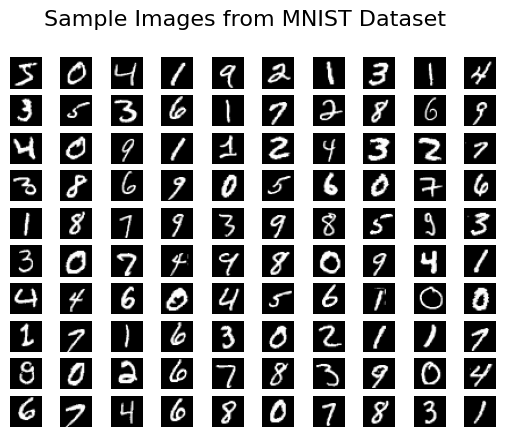

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "CPU")
print (f"device = {device}")

# Hyperparameters
batch_size = 2000
epochs = 10
learning_rate = 0.001

# Transform for normalization
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='/tmp/data', train=True, transform=transform, download=True)
test_dataset = torchvision.datasets.MNIST(root='/tmp/data', train=False, transform=transform, download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

# Visualizing some images
fig, ax = plt.subplots(10, 10)
k = 0
for i in range(10):
    for j in range(10):
        image, _ = train_dataset[k]
        ax[i][j].imshow(image.squeeze(), cmap='gray')
        ax[i][j].axis('off')
        k += 1
plt.suptitle("Sample Images from MNIST Dataset", fontsize=16)
plt.show()

### Step 2: Building the Neural Network Model

In [2]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
    
    def forward(self, x):
        x = self.flatten(x)
        x = self.sigmoid(self.fc1(x))
        x = self.sigmoid(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

# Initialize model, loss function, and optimizer
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

### Step 3: Training the Model

In [3]:
# Training loop
history = {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': []}

for epoch in range(epochs):
    model.train()
    correct = 0
    total = 0
    train_loss = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward pass
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_accuracy = 100 * correct / total
    history['accuracy'].append(train_accuracy)
    history['loss'].append(train_loss / len(train_loader))
    
    # Validation
    model.eval()
    correct = 0
    total = 0
    val_loss = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_accuracy = 100 * correct / total
    history['val_accuracy'].append(val_accuracy)
    history['val_loss'].append(val_loss / len(test_loader))
    
    print(f'Epoch [{epoch+1}/{epochs}], ' + \
          f'Loss: {train_loss/len(train_loader):.4f}, ' + \
          f'Accuracy: {train_accuracy:.2f}%, Val Loss: {val_loss/len(test_loader):.4f}, Val Accuracy: {val_accuracy:.2f}%')

Epoch [1/10], Loss: 2.2474, Accuracy: 22.22%, Val Loss: 2.1497, Val Accuracy: 37.44%
Epoch [2/10], Loss: 2.0540, Accuracy: 44.53%, Val Loss: 1.9691, Val Accuracy: 50.79%
Epoch [3/10], Loss: 1.9160, Accuracy: 57.75%, Val Loss: 1.8787, Val Accuracy: 58.83%
Epoch [4/10], Loss: 1.8410, Accuracy: 65.86%, Val Loss: 1.7887, Val Accuracy: 73.53%
Epoch [5/10], Loss: 1.7566, Accuracy: 74.26%, Val Loss: 1.7253, Val Accuracy: 75.89%
Epoch [6/10], Loss: 1.7210, Accuracy: 75.59%, Val Loss: 1.7086, Val Accuracy: 76.40%
Epoch [7/10], Loss: 1.7081, Accuracy: 76.23%, Val Loss: 1.6997, Val Accuracy: 76.88%
Epoch [8/10], Loss: 1.7006, Accuracy: 76.66%, Val Loss: 1.6939, Val Accuracy: 77.15%
Epoch [9/10], Loss: 1.6737, Accuracy: 80.75%, Val Loss: 1.6442, Val Accuracy: 84.26%
Epoch [10/10], Loss: 1.6341, Accuracy: 84.56%, Val Loss: 1.6226, Val Accuracy: 85.18%


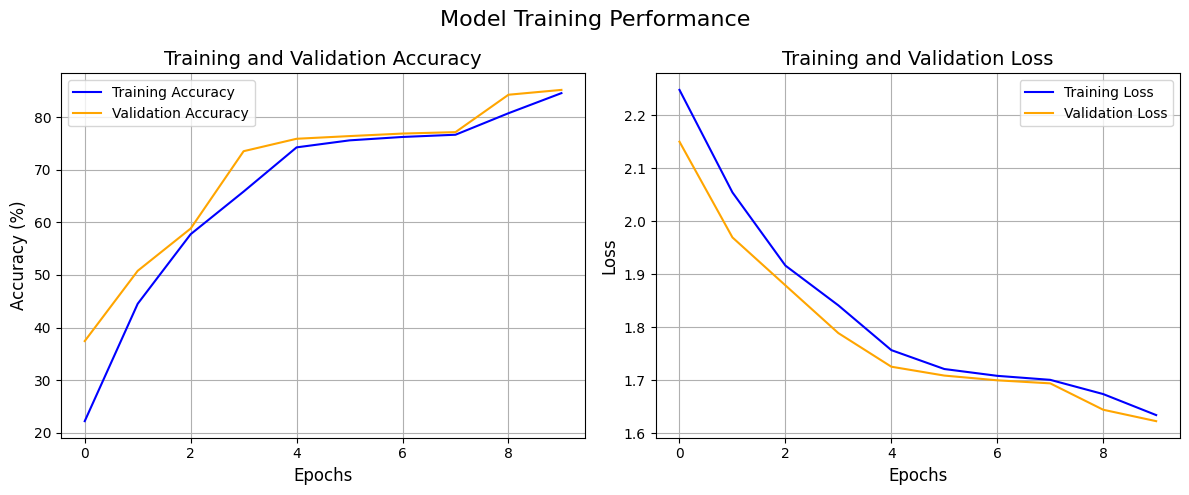

In [4]:
# Plot training history
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history['val_accuracy'], label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy (%)', fontsize=12)
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history['loss'], label='Training Loss', color='blue')
plt.plot(history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

plt.suptitle("Model Training Performance", fontsize=16)
plt.tight_layout()
plt.show()

### Step 4: Evaluating the Model
After training, we evaluate the model on the test dataset to determine its performance.

In [5]:
# Model evaluation
def evaluate_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Test Accuracy: {accuracy:.2f}%')

evaluate_model(model, test_loader)

Test Accuracy: 85.18%


# Discussion

## Advantages of Multi Layer Perceptron

- **Versatility**: MLPs can be applied to a variety of problems, both classification and regression.
- **Non-linearity**: Thanks to activation functions, MLPs can model complex, non-linear relationships in data.
- **Parallel Computation**: With the help of GPUs, MLPs can be trained quickly by taking advantage of parallel computing.

## Disadvantages of Multi Layer Perceptron

- **Computationally Expensive**: MLPs can be slow to train, especially on large datasets with many layers.
- **Prone to Overfitting**: Without proper regularization techniques, MLPs can overfit the training data, leading to poor generalization.
- **Sensitivity to Data Scaling**: MLPs require properly normalized or scaled data for optimal performance.

The **Multilayer Perceptron** has the ability to learn complex patterns from data makes it a valuable tool in machine learning. Whether you’re working with structured data, images, or text, understanding how MLP works can open doors to solving a wide range of problems.

## Frequently Asked Question (FAQs): Multi Layer Perceptron

### What is the function of MLP?

> The function of a Multi-Layer Perceptron (MLP) is to map input data to an output by learning patterns and relationships through multiple layers of interconnected neurons.
> 

### What are the applications of MLP?

> MLPs are used in applications like image recognition, natural language processing, speech recognition, financial forecasting, and medical diagnosis.
> 

### What are the advantages of multi layer perceptron?

> The advantages of MLP include the ability to handle non-linear relationships, adaptability to complex data patterns, and flexibility in solving a wide range of supervised learning tasks.
>